In [44]:
for i in range(20):
    print(i,"=>",0.75**(i))

0 => 1.0
1 => 0.75
2 => 0.5625
3 => 0.421875
4 => 0.31640625
5 => 0.2373046875
6 => 0.177978515625
7 => 0.13348388671875
8 => 0.1001129150390625
9 => 0.07508468627929688
10 => 0.056313514709472656
11 => 0.04223513603210449
12 => 0.03167635202407837
13 => 0.023757264018058777
14 => 0.017817948013544083
15 => 0.013363461010158062
16 => 0.010022595757618546
17 => 0.00751694681821391
18 => 0.005637710113660432
19 => 0.004228282585245324


In [4]:
import torch
from torch import nn

a = torch.rand(16,4)
b = torch.rand(16,4)
criterion = nn.MSELoss()
criterion_nored = nn.MSELoss(reduction='none')
print(criterion(a,b))
print(criterion_nored(a,b).mean(axis=0).sum())

tensor(0.1429)
tensor(0.5716)


In [44]:
import torch
from pytorch_tcn import TCN

model = TCN(
    num_inputs = 512,
    num_channels = [1024,2048,1024,512,256],
    kernel_size=2,
    dilation_reset = 16,
    input_shape='NLC',
)

# batch=10, ts=16, features=4
b = torch.ones(size=(10, 32, 512))
print(b.shape)
res = model(b)
print(res.shape)


other = res[:, :-1, :]
print(other.shape)
last_ts = res[:, -1 , :]
print(last_ts.shape)


torch.Size([10, 32, 512])
torch.Size([10, 32, 256])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([10, 31, 256])
torch.Size([10, 256])


In [40]:
a = torch.tensor([1,2,3],dtype=float, requires_grad=True)
b = torch.tensor([3,4,5],dtype=float, requires_grad=True)
c = torch.tensor([6,7,8],dtype=float, requires_grad=True)

x = torch.matmul(a.reshape(-1,1), b.reshape(1,-1))
y = torch.matmul(b.reshape(-1,1), c.reshape(1,-1))


z = torch.stack([x,y], dim=0)
print(z)

print(torch.autograd.grad(z.mean(), (x,y)))

tensor([[[ 3.,  4.,  5.],
         [ 6.,  8., 10.],
         [ 9., 12., 15.]],

        [[18., 21., 24.],
         [24., 28., 32.],
         [30., 35., 40.]]], dtype=torch.float64, grad_fn=<StackBackward0>)
(tensor([[0.0556, 0.0556, 0.0556],
        [0.0556, 0.0556, 0.0556],
        [0.0556, 0.0556, 0.0556]], dtype=torch.float64), tensor([[0.0556, 0.0556, 0.0556],
        [0.0556, 0.0556, 0.0556],
        [0.0556, 0.0556, 0.0556]], dtype=torch.float64))


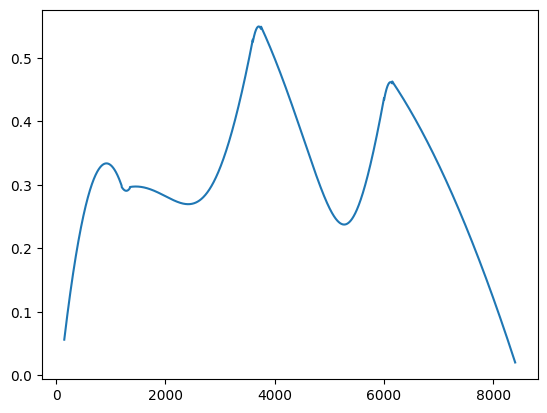

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from math import atan2

df = pd.read_csv("traj.csv")[['x','y','z','yaw']]

s = 150
dx = df['x']-df['x'].shift(s)
dy = df['y']-df['y'].shift(s)
dv = np.array( [ [dxi,dyi] for dxi, dyi in zip(dx,dy) ] )
plt.plot(np.linalg.norm(dv,axis=1))

dv_angle = dv - np.roll(dv, 1)
dv_angle
# dv_angle = [atan2(x[1], x[0]) for x in dv_angle]
# plt.plot(dv_angle)
dyaw = df['yaw'] - df['yaw'].shift(s)


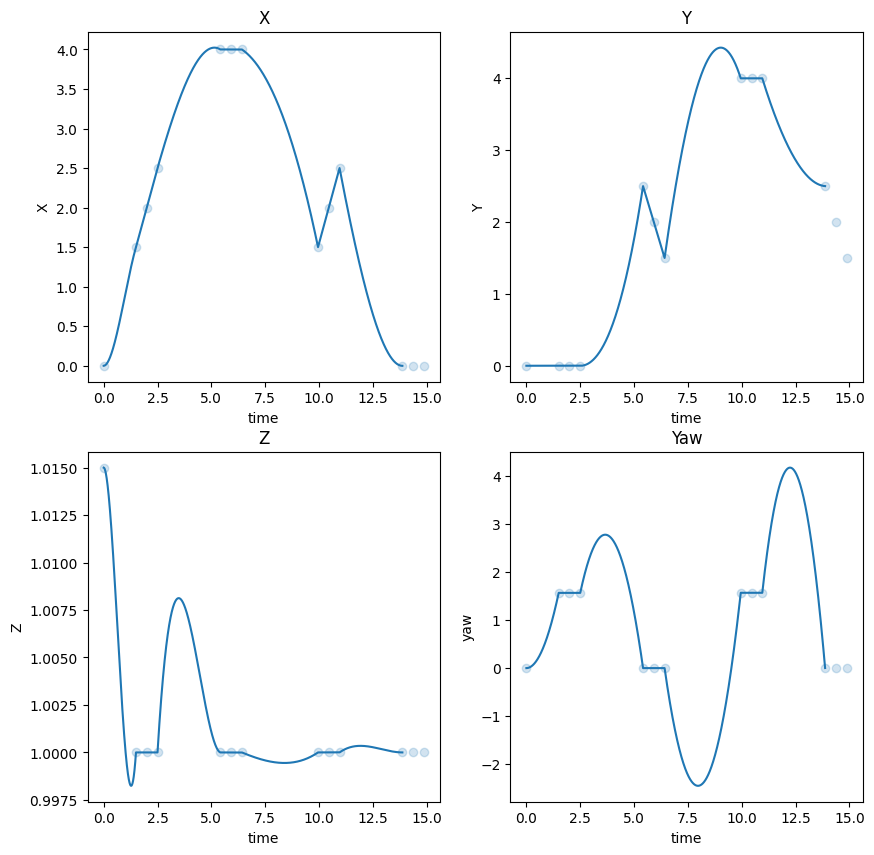

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,10)
fig, ax = plt.subplots(6,2)


traj = pd.read_csv('./gatefollowing/traj.csv')
traj['vel_x'] = traj['x'] - traj['x'].shift(1)
traj['vel_y'] = traj['y'] - traj['y'].shift(1)
traj['vel_z'] = traj['z'] - traj['z'].shift(1)
traj['vel_yaw'] = traj['yaw'] - traj['yaw'].shift(1)

wp = pd.read_csv('./gatefollowing/wp.csv')

ax[0,0].set_title('X')
ax[0,0].set_ylabel('X')
ax[0,0].set_xlabel('time')
ax[0,0].plot(traj['time'], traj['x'])
ax[0,0].scatter(wp['time'], wp['x'], alpha=0.2)

ax[0,1].set_title('Y')
ax[0,1].set_ylabel('Y')
ax[0,1].set_xlabel('time')
ax[0,1].plot(traj['time'], traj['y'])
ax[0,1].scatter(wp['time'], wp['y'], alpha=0.2)

ax[1,0].set_title('Z')
ax[1,0].set_ylabel('Z')
ax[1,0].set_xlabel('time')
ax[1,0].plot(traj['time'], traj['z'])
ax[1,0].scatter(wp['time'], wp['z'], alpha=0.2)

ax[1,1].set_title('Yaw')
ax[1,1].set_ylabel('yaw')
ax[1,1].set_xlabel('time')
ax[1,1].plot(traj['time'], traj['yaw'])
ax[1,1].scatter(wp['time'], wp['yaw'], alpha=0.2)


ax[2+0,0].set_title('Vel X')
ax[2+0,0].set_ylabel('Vel X')
ax[2+0,0].set_xlabel('time')
ax[2+0,0].plot(traj['time'], traj['vel_x'])
ax[2+0,0].scatter(wp['time'], wp['x'], alpha=0.2)

ax[2+0,1].set_title('Y')
ax[2+0,1].set_ylabel('Y')
ax[2+0,1].set_xlabel('time')
ax[2+0,1].plot(traj['time'], traj['y'])
ax[2+0,1].scatter(wp['time'], wp['y'], alpha=0.2)

ax[2+1,0].set_title('Z')
ax[2+1,0].set_ylabel('Z')
ax[2+1,0].set_xlabel('time')
ax[2+1,0].plot(traj['time'], traj['z'])
ax[2+1,0].scatter(wp['time'], wp['z'], alpha=0.2)

ax[2+1,1].set_title('Yaw')
ax[2+1,1].set_ylabel('yaw')
ax[2+1,1].set_xlabel('time')
ax[2+1,1].plot(traj['time'], traj['yaw'])
ax[2+1,1].scatter(wp['time'], wp['yaw'], alpha=0.2)

plt.show()

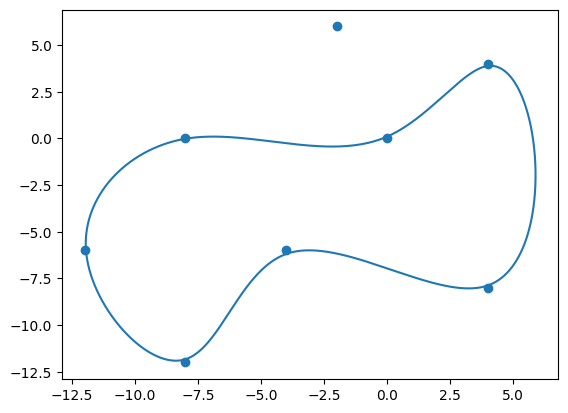

57.6261910813468
0.0021958690348415503
[[ 0.00403564  0.10068793]
 [ 0.00592526  0.10180288]
 [ 0.00781457  0.10291921]
 ...
 [-0.00163507  0.09735135]
 [ 0.00025547  0.09846216]
 [ 0.00214571  0.09957436]]


In [7]:
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
import numpy as np
import pandas as pd

wp = np.array([
    [2,2],
    [4,4],
    [4,-2],
    [0,-1],
    [-2, -4], 
    [-4, -1],
    [-2,2],
    [1,5],
    # [-5,1],
])

wp -= wp[0]
wp *= 2
plt.scatter(wp.T[0],wp.T[1])
tck, u = splprep(wp.T, s=.1, per=True) ### CAMBIARE PER=False PER SKIDPAD MAP
u = np.linspace(0, 1, 26244)[:-1] #int(tot_dist*10)
new_points = splev(u, tck)
new_points_array = np.array( new_points ).T
plt.plot(new_points_array[:,0], new_points_array[:,1])

plt.show()

dist = 0
for i in range(len(new_points_array)-1):
    dist += np.linalg.norm(new_points_array[i+1]-new_points_array[i])

print(dist)
print(dist/len(new_points_array))
print(new_points_array)
wp_df = pd.DataFrame(new_points_array, columns=['x','y'])
wp_df['z'] = pd.Series([1 for _ in range(len(new_points_array))])

wp_df.to_csv('a.csv')

AAA 0
[0.00188993 0.00188962 0.00188931 ... 0.00189085 0.00189054 0.00189024]
[0.0021936  0.00219403 0.00219447 ... 0.0021923  0.00219273 0.00219316]
[0.27940792 0.27931136 0.27897251 ... 0.27951352 0.27947874 0.27944354]
1.6631947862330432 1.181676900985141e-05


100%|██████████| 53/53 [00:00<00:00, 578.23it/s]
/tmp/ipykernel_3500/1354290425.py:44: UserWarning: Legend does not support handles for Text instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


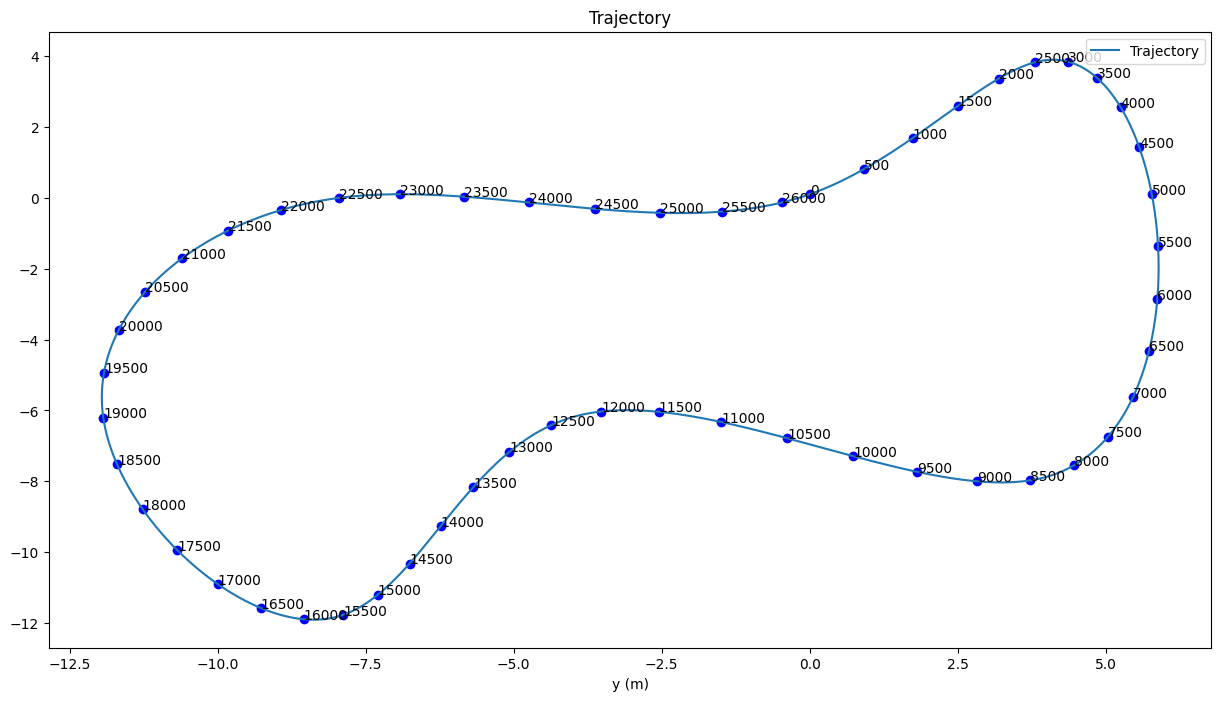

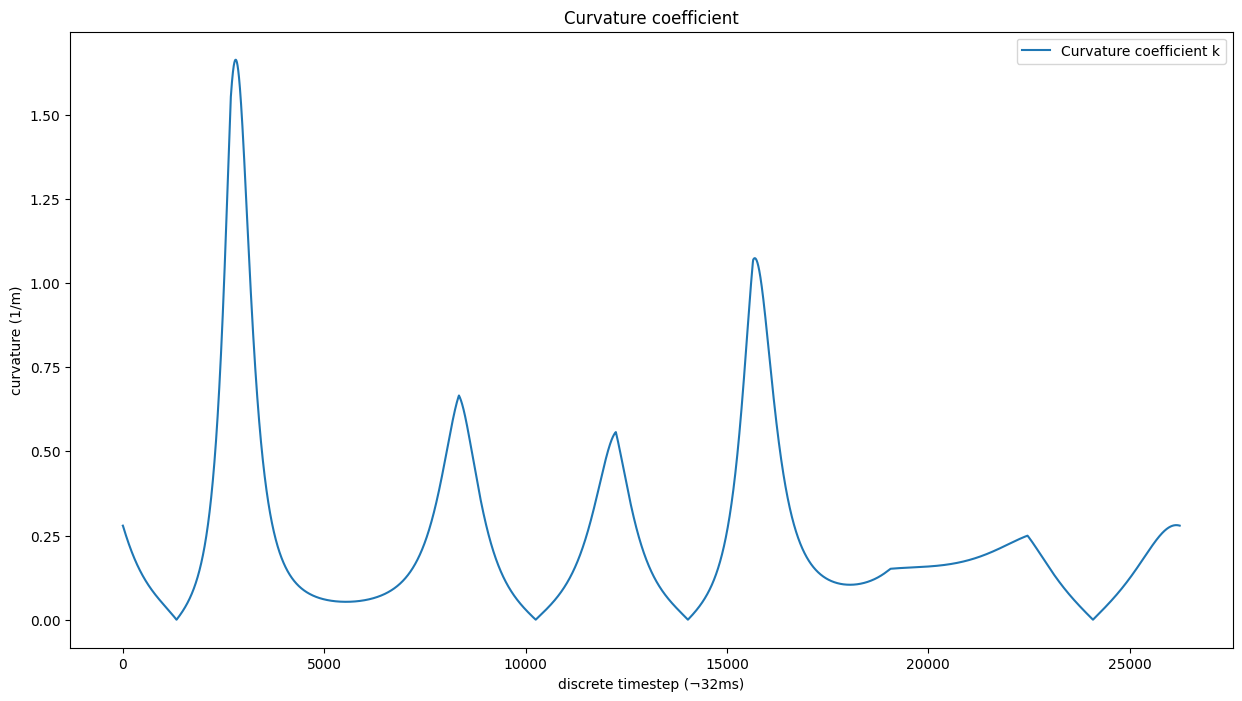

Plotting map...

100%|██████████| 1313/1313 [00:04<00:00, 311.29it/s]


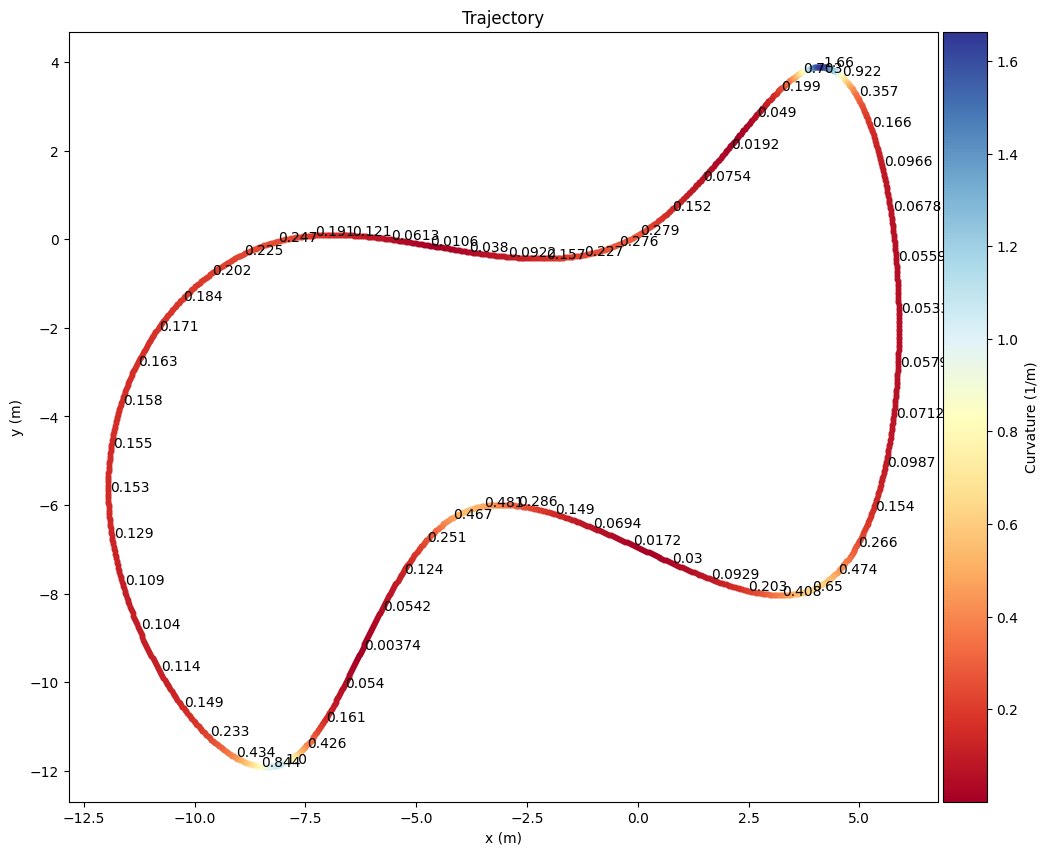

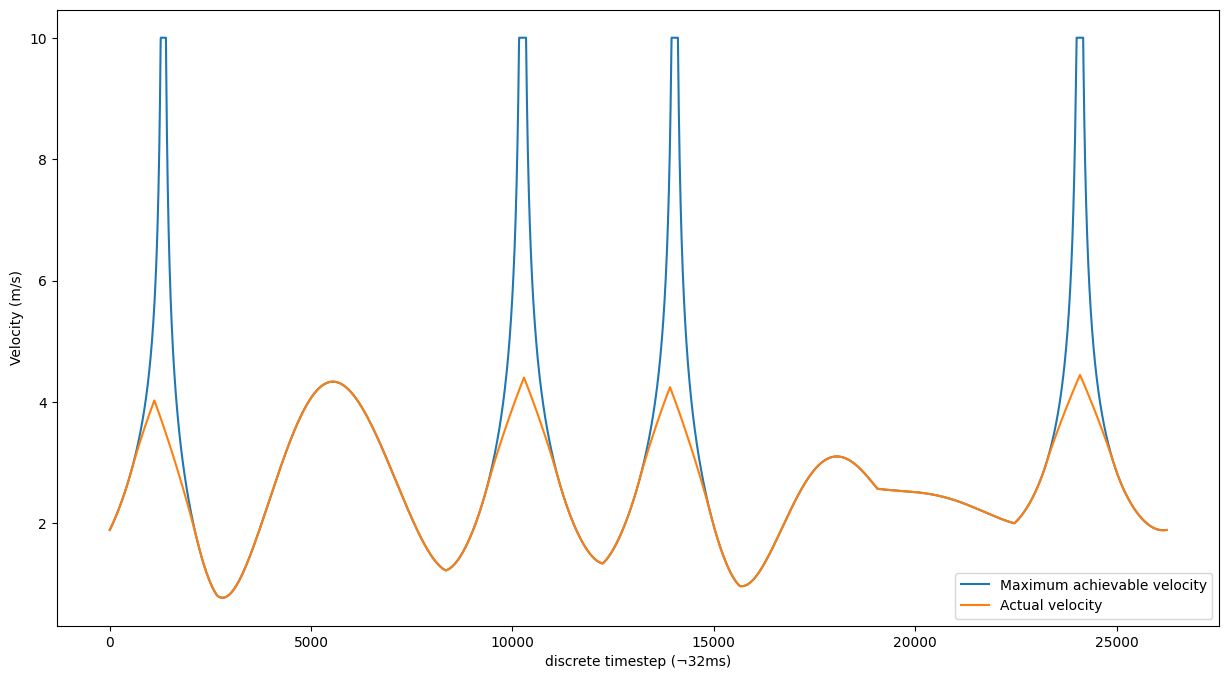

In [12]:
import numpy as np
from controller_utils.trajectory_generator import TrajectoryGenerator
from controller_utils.velocity_profiler import VelocityProfiler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import savgol_filter
import tqdm

# tg_config = {    
#         "traj_conf": {
#             "other_radius_frac": 0.5836851660178529,
#             "radius": 4.064060073014778,
#             "shift_left": False
#         },
#         "traj_type": "ellipse"
#     }
tg_config = {"traj_type": "csv"}
tg = TrajectoryGenerator(**tg_config)
vp = VelocityProfiler(3, 3, 1)
traj = tg.generate_trajectory()
# traj = traj[50: -10]


k, v_max = vp.get_max_velocity(traj)
# k=k[10:]
# v_max=v_max[10:]
v = vp.get_real_velocity(traj, v_max, k)
print(max(k), min(k))

plt.rcParams['figure.figsize'] = (15,8)
plt.title("Trajectory")
plt.plot(traj[:,0], traj[:,1], label='Trajectory')
for i in tqdm.tqdm(range(0,len(traj), 500)):
    plt.scatter(traj[i,0], traj[i,1], c='b')
    plt.text(traj[i,0], traj[i,1], f"{i}")
plt.text(0,0,'', label='Index')
plt.xlabel('x (m)')
plt.xlabel('y (m)')
plt.legend()
plt.show()

plt.title("Curvature coefficient")
plt.plot(k, label='Curvature coefficient k')
plt.legend()
plt.xlabel("discrete timestep (¬32ms)")
plt.ylabel("curvature (1/m)")
plt.show()

########### PLOTTING MAP WITH K
print("Plotting map...", end='')
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax.set_aspect('equal', adjustable='box')

ax.set_title("Trajectory")
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")

cmap = cm.RdYlBu
norm_k = Normalize(vmin=min(k), vmax=max(k))


for i in tqdm.tqdm(range(0, len(k), 20)):
    ax.scatter(traj[i, 0], traj[i, 1], color=cmap(norm_k(k[i])), alpha=1, s=0.3*plt.rcParams['lines.markersize']**2)
    # if i % 400 == 0:
    #     ax.text(traj[i,0]+0.05, traj[i,1], f"{k[i]:.3}")
        
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm_k) 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)


plt.colorbar(sm, cax=cax, label="Curvature (1/m)", orientation="vertical", fraction=0.046, pad=0.04) 
plt.show()

plt.plot(v_max, label='Maximum achievable velocity')
plt.plot(v, label='Actual velocity')
plt.xlabel("discrete timestep (¬32ms)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.show()


# print("Plotting map...", end='')
# fig, ax = plt.subplots()
# fig.set_size_inches(15,12)
# ax.axis('equal')

# cmap = cm.RdYlBu
# norm = Normalize(vmin=min(k), vmax=max(k))
# norm_v = Normalize(vmin=min(v), vmax=max(v))


# for i in tqdm.tqdm(range(0,len(k), 20)):
#     ax.scatter(traj[i,0], traj[i,1], color=cmap(norm(v[i])), alpha=1, s=0.3*plt.rcParams['lines.markersize']**2)
#     if i % 400 == 0:
#         ax.text(traj[i,0], traj[i,1], f"{v[i]:.3}")

# # ax.scatter(self.cones[:, 0], self.cones[:, 1], marker="1", s=0.5*plt.rcParams['lines.markersize']**2)
# plt.show()

# print("Plotting map with coefficients...", end='')
# fig, ax = plt.subplots()
# fig.set_size_inches(15,12)
# ax.axis('equal')

# cmap = cm.RdYlBu
# norm = Normalize(vmin=min(k), vmax=max(k))
# norm_v = Normalize(vmin=min(v), vmax=max(v))


# for i in tqdm.tqdm(range(0,len(k), 20)):
#     ax.scatter(traj[i,0], traj[i,1], color=cmap(norm(v[i])), alpha=1, s=0.3*plt.rcParams['lines.markersize']**2)
#     if i % 400 == 0:
#         ax.text(traj[i,0], traj[i,1], f"{v[i]:.3}")

# # ax.scatter(self.cones[:, 0], self.cones[:, 1], marker="1", s=0.5*plt.rcParams['lines.markersize']**2)
# plt.show()

